<h1>This visualization is inspired by video from 3Blue1Brown youtube channel</h1>
<h2>
    <a href="https://www.youtube.com/watch?v=spUNpyF58BY">But what is the Fourier Transform? A visual introduction</a>
</h2>

---

# Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, FloatSlider, Layout
import ipywidgets as widgets

# Some constants

In [2]:
f_min, f_max = 0.0, 20
f_step = 0.05

f_range = np.arange(f_min, f_max, f_step)

# Functions

In [3]:
rotating_arrow = lambda f, t: np.exp(-2*np.pi*1j*f*t)

In [4]:
original_fn = lambda t: np.sin(18.8495559*t)+1
# original_fn = lambda t: np.sin(t)+np.cos(2*t)-np.sin(t/3)+3

# Calculations

In [5]:
t = np.arange(0, 4.5, 0.001)

In [6]:
# I'm doing these calculation before hand so that the visualization will run smooth.

# Calculating g
g = np.array(
    [original_fn(t)*rotating_arrow(t, f)
     for f in f_range]
)

# Calculating center_of_mass
center_of_mass = np.mean(g, axis=1)

# Visualization

## Winding graph

In [7]:
@interact(f=widgets.FloatSlider(min=f_min, max=f_max-f_step, step=f_step, value=2.9, layout=Layout(width='800px')))
def callback(f):
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(14, 14)

    ax.set_xlim(-2.3, 2.3)
    ax.set_ylim(-2.3, 2.3)

    # Moving axis in center
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    
    # Axis tick labels
    ax.get_xaxis().set_ticklabels([])
    ax.get_yaxis().set_ticklabels([])

    ith_f = int(f*(1/f_step))

    # Winding graph & center of mass
    ax.plot(g[ith_f].real, g[ith_f].imag)
    ax.scatter(center_of_mass[ith_f].real, center_of_mass[ith_f].imag, c='r', s=100)

interactive(children=(FloatSlider(value=2.9, description='f', layout=Layout(width='800px'), max=19.95, step=0.…

## Center of mass

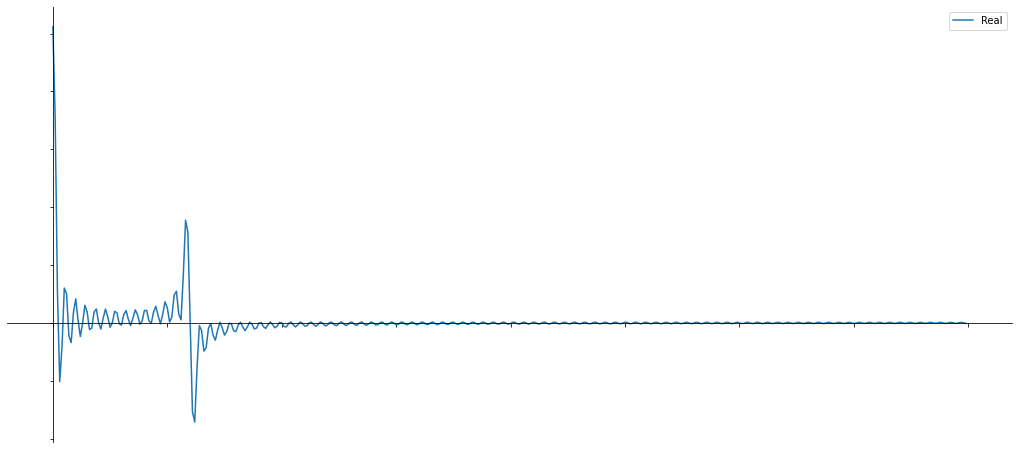

In [8]:
def com_graph():
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(18, 8)

    ax.plot(f_range, center_of_mass.real)
    # ax.plot(f_range, center_of_mass.imag)
    ax.legend(['Real', 'Imaginary'])

    # Moving axis in center
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Axis tick labels
    ax.get_xaxis().set_ticklabels([])
    ax.get_yaxis().set_ticklabels([])
com_graph()